In [851]:
from __future__ import division
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from scipy import optimize, stats
import mpmath as mp

In [852]:
sm.init_printing(use_unicode=True)
A = sm.symbols("A")
n = sm.symbols("n")
g = sm.symbols("g")
s= sm.symbols("s")
k= sm.symbols("k")
alpha = sm.symbols("alpha")
delta = sm.symbols("delta")
ktilde = sm.symbols("ktilde")
ktildeg = sm.symbols("ktilde_g")
ytilde = sm.symbols("ytilde")
ktildestar = sm.symbols("ktilde^*")
ktildestarg = sm.symbols("ktilde^*""_g")
ytildestar = sm.symbols("ytilde^*")
ystar = sm.symbols("y^*")
kstar = sm.symbols("k^*")
kstaralpha = sm.symbols("(kstar)")

We have the production function $$Y = K^{\alpha} (AL)^{(1-\alpha)}$$

We have the capital accumulation function: $${\dot{k}} = sAk^{\alpha} - (\delta+n){k}$$ 

We will solve for the steady state:

In [853]:
k1eq = sm.Eq(s*A*k**alpha- (delta+n)*k)
k1eq

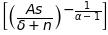

In [854]:
k1solve =sm.solve(k1eq, k)
k1solve

Steady state output per worker is then $y = (k^*)^\alpha$ which equals $$(\frac{As}{\delta+n})^{\frac{\alpha}{1-\alpha}}$$

Simulation


In [855]:
A=1
g1 = 0.02 
n1 = 0.01
delta1 = 0.05 
alpha1 = 0.33 #Usually determined to be around this amount cf. lectures.
s1=0.28

In [856]:
k1steady = ((A*s1)/(delta1+n1))**(1/(1-alpha1))
k1steady

Expanding into the solow model with technological advances we now have our capital accumulation relationship $$\tilde{\dot{k}} = s\tilde{k}^{\alpha} - (\delta+n+g)\tilde{k}$$ 

In [857]:
keq = sm.Eq(ktilde**alpha*s-(n+delta+g)*ktilde)
keq

In [858]:
ksolve = sm.solve(keq, ktilde)
ksolve

In [859]:
ktildesolved = sm.Eq(ktildestar, ((delta+g+n)/s)**(1/(alpha-1)))
ktildesolved #(s*A/delta)**(1.0/(1.0-alpha))

Furthermore we have $\tilde{y} = \tilde{k}^\alpha$. which leads us to:

In [860]:
ytildesolved = sm.Eq(ytildestar, ((delta+g+n)/s)**(alpha/(alpha-1)))
ytildesolved

Which is our steady state output per worker. We see that it depends positively on the investment rate and negatively on the population growth and capital depreciation rate. 

In the steady state we have that (from our production function) $$k(t) = A(t)\tilde{k}^*$$
<br>
Which leads us to
$$lnk(t) = lnA(t) ln\tilde{k}^*$$
<br> Remembering that $\tilde{\dot{k}^*}$ is equal to 0 in steady state we find that $$\frac{\dot{k}}{k} = \frac{\dot{A}}{A}$$ <br> Which suggests that capital per capita growth grow at the rate of technological growth. 

So far we have concluded that savings contribute to a higher k and therefore a higher y. Let's find the optimal kapital stock using the golden rule from savings.  

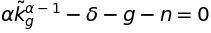

In [861]:
seq=sm.Eq(alpha*ktildeg**(alpha-1)-n-delta-g)
seq

In [862]:
ssolve = sm.solve(seq, ktildeg)
ssolve

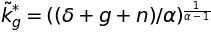

In [863]:
ktildegsolved = sm.Eq(ktildestarg, ((delta+g+n)/alpha)**(1/(alpha-1)))
ktildegsolved

Which resembles the golden rule of capital. Then, if $\tilde{k}^* > \tilde{k}_g$, the economy is dynamically inefficient. If $\tilde{k}^* <= \tilde{k}_g$, the economy is dynamically efficient. Given usual estimates of $\alpha = 0.33$ and s = [0.15;0.3] then $\tilde{k}^{*}$ (in our case s=0.28) is usually larger

We now simulate a model with parameters from World Bank. The paremeters are taken from Denmark in the period of2012-2017 for the data that is available. Parameters such as alpha and delta are taken from rules of thumb. 

In [864]:
g = 0.02
L0 = 100 
n = 0.01
delta = 0.05 
alpha = 0.33 #Usually determined to be around this amount cf. lectures.
s=0.28 #Somewhat of an average of the index on WB for Denmark.


We may now provide estimates of the steady state values. 

In [865]:
ktildesolved2 = sm.Eq(ktildestar, ((delta+g+n)/s)**(1/(alpha-1)))
ktildesolved2

In [866]:
ytildesolved2 = sm.Eq(ytildestar, ((delta+g+n)/s)**(alpha/(alpha-1)))
ytildesolved2

Let's try visualizing the steady state

In [867]:
# Defining steady state as I am not sure how to utilize the expressions above in this circumstance.
ksteady = ((delta+g+n)/s)**(1/(alpha-1))

In [868]:
#Define domain and our capital accumulation function for loop:
kmin = 0.0
kmax = ksteady*1.5
k_set = np.linspace(kmin, kmax)
u = lambda x: s-(1-delta)*x+x #Capital accumulation rewritten

#Equilibrium path
T = 200
k = np.zeros((T,1))
k[0] = 0.01
for t in range(T-1):
    k[t+1] = u(k[t])


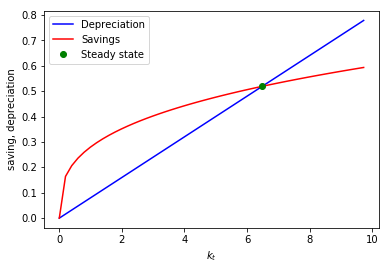

In [869]:
# Lambda functions to plot the savings and depreciation rates.
sav_k = lambda x: (s)*x**alpha #share of savings
depr_k = lambda x: (g+n+delta)*x
depr = depr_k(k_set)
sav = sav_k(k_set)

plt.plot(k_set, depr, 'b-', label='Depreciation')          
plt.plot(k_set, sav, 'r-', label='Savings' )          
plt.plot(ksteady, depr_k(ksteady), 'go', label='Steady state' ) 
plt.xlabel('$k_{t}$')
plt.ylabel('saving, depreciation')
plt.grid = True
plt.legend()
plt.show()

We then see that the steady state is approximately 6.49